In [1]:
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets, transforms, models
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import sys, os
from glob import glob
import imageio

In [2]:
%matplotlib inline
sns.set_style('whitegrid')

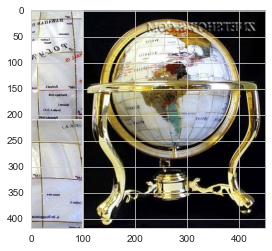

In [3]:
plt.imshow(imageio.imread('training/0_888.jpg'))

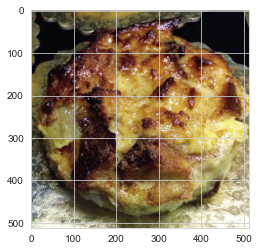

In [4]:
# Food images start with 1, non-food images start with 0
plt.imshow(imageio.imread('training/1_888.jpg'))

In [5]:
!mkdir data

In [6]:
!mkdir data\train
!mkdir data\test
!mkdir data\train\noonfood
!mkdir data\train\food
!mkdir data\test\noonfood
!mkdir data\test\food

In [7]:
!move training\0*.jpg data\train\nonfood
!move training\1*.jpg data\train\food
!move validation\0*.jpg data\test\noonfood
!move validation\1*.jpg data\test\food

Невозможно переместить несколько файлов в один файл.


C:\Users\Computer Store\Desktop\PyTorch - Udemy\9 - Transfer Learning for Computer Vision\training\1_0.jpg
C:\Users\Computer Store\Desktop\PyTorch - Udemy\9 - Transfer Learning for Computer Vision\training\1_1.jpg
C:\Users\Computer Store\Desktop\PyTorch - Udemy\9 - Transfer Learning for Computer Vision\training\1_10.jpg
C:\Users\Computer Store\Desktop\PyTorch - Udemy\9 - Transfer Learning for Computer Vision\training\1_100.jpg
C:\Users\Computer Store\Desktop\PyTorch - Udemy\9 - Transfer Learning for Computer Vision\training\1_1000.jpg
C:\Users\Computer Store\Desktop\PyTorch - Udemy\9 - Transfer Learning for Computer Vision\training\1_1001.jpg
C:\Users\Computer Store\Desktop\PyTorch - Udemy\9 - Transfer Learning for Computer Vision\training\1_1002.jpg
C:\Users\Computer Store\Desktop\PyTorch - Udemy\9 - Transfer Learning for Computer Vision\training\1_1003.jpg
C:\Users\Computer Store\Desktop\PyTorch - Udemy\9 - Transfer Learning for Computer Vision\training\1_1004.jpg
C:\Users\Computer S

C:\Users\Computer Store\Desktop\PyTorch - Udemy\9 - Transfer Learning for Computer Vision\training\1_999.jpg
Перемещено файлов:      1500.
C:\Users\Computer Store\Desktop\PyTorch - Udemy\9 - Transfer Learning for Computer Vision\validation\0_0.jpg
C:\Users\Computer Store\Desktop\PyTorch - Udemy\9 - Transfer Learning for Computer Vision\validation\0_1.jpg
C:\Users\Computer Store\Desktop\PyTorch - Udemy\9 - Transfer Learning for Computer Vision\validation\0_10.jpg
C:\Users\Computer Store\Desktop\PyTorch - Udemy\9 - Transfer Learning for Computer Vision\validation\0_100.jpg
C:\Users\Computer Store\Desktop\PyTorch - Udemy\9 - Transfer Learning for Computer Vision\validation\0_101.jpg
C:\Users\Computer Store\Desktop\PyTorch - Udemy\9 - Transfer Learning for Computer Vision\validation\0_102.jpg
C:\Users\Computer Store\Desktop\PyTorch - Udemy\9 - Transfer Learning for Computer Vision\validation\0_103.jpg
C:\Users\Computer Store\Desktop\PyTorch - Udemy\9 - Transfer Learning for Computer Vision

C:\Users\Computer Store\Desktop\PyTorch - Udemy\9 - Transfer Learning for Computer Vision\validation\1_0.jpg
C:\Users\Computer Store\Desktop\PyTorch - Udemy\9 - Transfer Learning for Computer Vision\validation\1_1.jpg
C:\Users\Computer Store\Desktop\PyTorch - Udemy\9 - Transfer Learning for Computer Vision\validation\1_10.jpg
C:\Users\Computer Store\Desktop\PyTorch - Udemy\9 - Transfer Learning for Computer Vision\validation\1_100.jpg
C:\Users\Computer Store\Desktop\PyTorch - Udemy\9 - Transfer Learning for Computer Vision\validation\1_101.jpg
C:\Users\Computer Store\Desktop\PyTorch - Udemy\9 - Transfer Learning for Computer Vision\validation\1_102.jpg
C:\Users\Computer Store\Desktop\PyTorch - Udemy\9 - Transfer Learning for Computer Vision\validation\1_103.jpg
C:\Users\Computer Store\Desktop\PyTorch - Udemy\9 - Transfer Learning for Computer Vision\validation\1_104.jpg
C:\Users\Computer Store\Desktop\PyTorch - Udemy\9 - Transfer Learning for Computer Vision\validation\1_105.jpg
C:\Use

C:\Users\Computer Store\Desktop\PyTorch - Udemy\9 - Transfer Learning for Computer Vision\validation\1_277.jpg
C:\Users\Computer Store\Desktop\PyTorch - Udemy\9 - Transfer Learning for Computer Vision\validation\1_278.jpg
C:\Users\Computer Store\Desktop\PyTorch - Udemy\9 - Transfer Learning for Computer Vision\validation\1_279.jpg
C:\Users\Computer Store\Desktop\PyTorch - Udemy\9 - Transfer Learning for Computer Vision\validation\1_28.jpg
C:\Users\Computer Store\Desktop\PyTorch - Udemy\9 - Transfer Learning for Computer Vision\validation\1_280.jpg
C:\Users\Computer Store\Desktop\PyTorch - Udemy\9 - Transfer Learning for Computer Vision\validation\1_281.jpg
C:\Users\Computer Store\Desktop\PyTorch - Udemy\9 - Transfer Learning for Computer Vision\validation\1_282.jpg
C:\Users\Computer Store\Desktop\PyTorch - Udemy\9 - Transfer Learning for Computer Vision\validation\1_283.jpg
C:\Users\Computer Store\Desktop\PyTorch - Udemy\9 - Transfer Learning for Computer Vision\validation\1_284.jpg
C:

In [9]:
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(size=256, scale=(0.8, 1.0)),
    transforms.RandomRotation(degrees=15),
    transforms.ColorJitter(),
    transforms.CenterCrop(size=224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.Resize(size=224),
    transforms.CenterCrop(size=224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [11]:
train_dataset = datasets.ImageFolder('data/train', transform=train_transform)
test_dataset = datasets.ImageFolder('data/test', transform=test_transform)

In [12]:
batch_size = 128
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [13]:
# Define the model
model = models.vgg16(pretrained=True)

# Freeze VGG weights
for param in model.parameters():
    param.requires_grad = False

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to C:\Users\Computer Store/.cache\torch\hub\checkpoints\vgg16-397923af.pth


In [15]:
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [16]:
model.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)

In [17]:
n_features = model.classifier[0].in_features
n_features

25088

In [18]:
# We are doing binary classification
model.classifier = nn.Linear(n_features, 2)
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [23]:
device = torch.device('cpu')
model.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [24]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [25]:
# A function to encapsulate the training loop
def batch_gd(model, criterion, optimizer, train_loader, test_loader, epochs):
    train_losses = np.zeros(epochs)
    test_losses = np.zeros(epochs)
    
    for i in range(epochs):
        t0 = datetime.now()
        train_loss = []
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            
            # zero the parameter gradients
            optimizer.zero_grad()
            
            # forward pass
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            
            # backward and optimize
            loss.backward()
            optimizer.step()
            
            train_loss.append(loss.item())
            
        # Get train loss and test loss
        train_loss = np.mean(train_loss)
        
        test_loss = []
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            test_loss.append(loss.item())
        test_loss = np.mean(test_loss)
        
        # Save losses
        train_losses[i] = train_loss
        test_losses[i] = test_loss
        
        dt = datetime.now() - t0
        print(f'Epoch {i+1}/{epochs}, Train Loss: {train_loss:.4f}, \ Test Loss: {test_loss:.4f}, Duration: {dt}')
    
    return train_losses, test_losses

In [26]:
train_losses, test_losses = batch_gd(model, criterion, optimizer, train_loader, test_loader, epochs=5)

Epoch 1/5, Train Loss: 0.2005, \ Test Loss: 0.0550, Duration: 0:25:21.538109
Epoch 2/5, Train Loss: 0.0732, \ Test Loss: 0.0296, Duration: 0:46:14.294955
Epoch 3/5, Train Loss: 0.0201, \ Test Loss: 0.0186, Duration: 0:42:52.883113
Epoch 4/5, Train Loss: 0.0128, \ Test Loss: 0.0309, Duration: 0:22:04.895036
Epoch 5/5, Train Loss: 0.0149, \ Test Loss: 0.0240, Duration: 0:19:23.729442


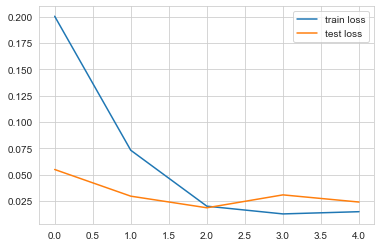

In [27]:
# Plot the train loss and test loss per iteration
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()

In [28]:
# Accuracy
n_correct = 0.
n_total = 0.
for inputs, targets in train_loader:
    # move data to GPU
    inputs, targets = inputs.to(device), targets.to(device)
    
    
    # forward pass
    outputs = model(inputs)
    
    # Get prediction
    # torch.max returns both max and argmax
    _, predictions = torch.max(outputs, 1)
    
    # update counts
    n_correct += (predictions == targets).sum().item()
    n_total += targets.shape[0]

train_acc = n_correct / n_total


n_correct = 0.
n_total = 0.
for inputs, targets in test_loader:
    # move data to GPU
    inputs, targets = inputs.to(device), targets.to(device)
    
    # forward pass
    outputs = model(inputs)
    
    # Get prediction
    # torch.max returns both max and argmax
    _, predictions = torch.max(outputs, 1)
    
    # update counts
    n_correct += (predictions == targets).sum().item()
    n_total += targets.shape[0]

test_acc = n_correct / n_total

print(f'Train accuracy: {train_acc:.4f}, Test accuracy: {test_acc:.4f}')

Train accuracy: 0.9927, Test accuracy: 0.9820
